In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('reddit_wsb.csv')

print('Shape of df with outliers: ', df.shape)
# Converting timestamp to datetime object + removing created UNIX column
df.drop('created', axis=1, inplace=True)
df['timestamp'] = pd.to_datetime(df.timestamp)

print(df['timestamp'].min())
print(df['timestamp'].max())
# Removing Outliers for timestamp
df = df[~(df['timestamp'] < '2020-10-29 03:46:56')]
# Removing Outliers for score
df = df[df['score'] < 32000]
df = df[df['score'] > 1]
df['title length'] = 0
df.reset_index(drop=True, inplace=True)

print('Shape of df without outliers: ', df.shape)
# Adding a column that describes the no. of characters in the title
for x in range(len(df.title)):
    df['title length'][x] = len(df['title'].iloc[x])
    
df.to_csv('datasets\\wsb_dataset.csv')

Shape of df with outliers:  (43516, 8)
2020-09-29 03:46:56
2021-03-26 17:21:33
Shape of df without outliers:  (30680, 8)


In [9]:
df.groupby(pd.Grouper(key='timestamp',freq='D'))['score'].count()
df.score.max()

31862

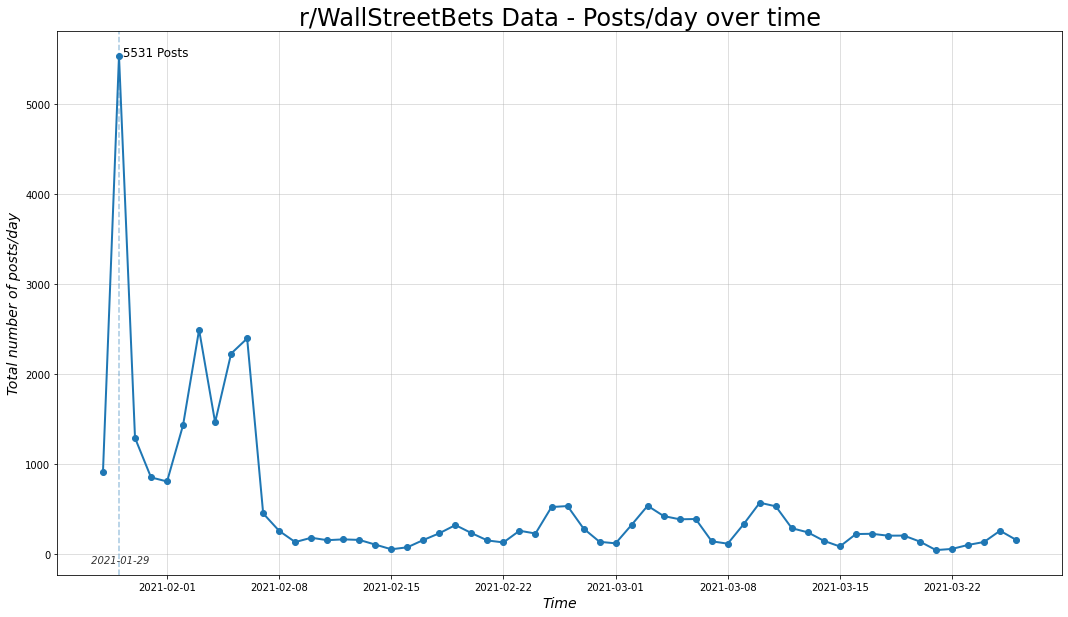

In [489]:
plt.figure(figsize=(18,10))
plt.plot(df.groupby(pd.Grouper(key='timestamp',freq='D'))['score'].count(), alpha=1, linewidth=2, marker='o', zorder=3)
plt.grid(alpha=.5, zorder=0)
plt.text((pd.to_datetime('2021-01-29')), 5531, ' 5531 Posts', fontsize=12)
plt.text((pd.to_datetime('2021-01-29')), -100, ' 2021-01-29', fontsize=10, horizontalalignment='center', alpha=.8, style='italic')
plt.xlabel('Time', fontsize=14, style='italic')
plt.ylabel('Total number of posts/day', fontsize=14, style='italic')
plt.axvline(x=pd.to_datetime('2021-01-29'), ls='--', alpha=.4)
plt.title('r/WallStreetBets Data - Posts/day over time', fontsize=24, weight='medium')
plt.savefig('Line, posts_day.png', facecolor='white', edgecolor='none')

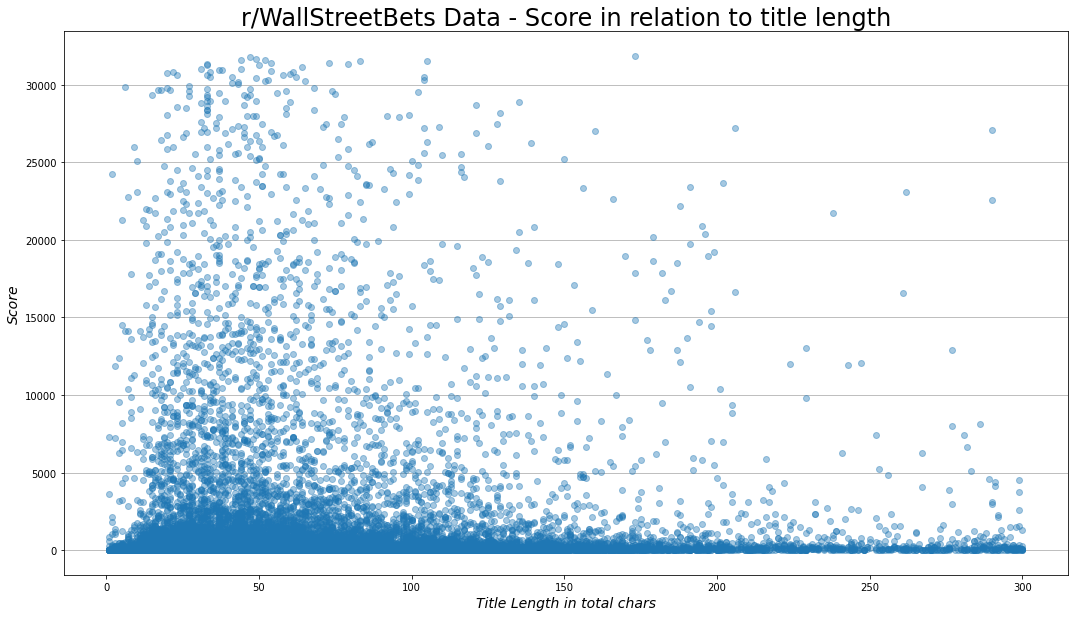

In [490]:
plt.figure(figsize=(18,10))
plt.scatter(df['title length'], df['score'], alpha=.4, zorder=3)
plt.grid(axis='y', zorder=0)
plt.xlabel('Title Length in total chars',fontsize=14, style='italic')
plt.ylabel('Score', fontsize=14, style='italic')
plt.title('r/WallStreetBets Data - Score in relation to title length', fontsize=24, weight='medium')
plt.savefig('Scatter, score ttlength.png', facecolor='white', edgecolor='none')

In [459]:
bins = pd.IntervalIndex.from_tuples([(0, 24), (25, 49), (50, 99), (100, 149), (150, 199), (200, 249), (250,300)])
df.groupby(pd.cut(df['title length'], bins))['score'].mean()

title length
(0, 24]        677.130495
(25, 49]       984.029550
(50, 99]       962.465442
(100, 149]    1073.943470
(150, 199]    1181.426282
(200, 249]     924.568365
(250, 300]     923.134228
Name: score, dtype: float64

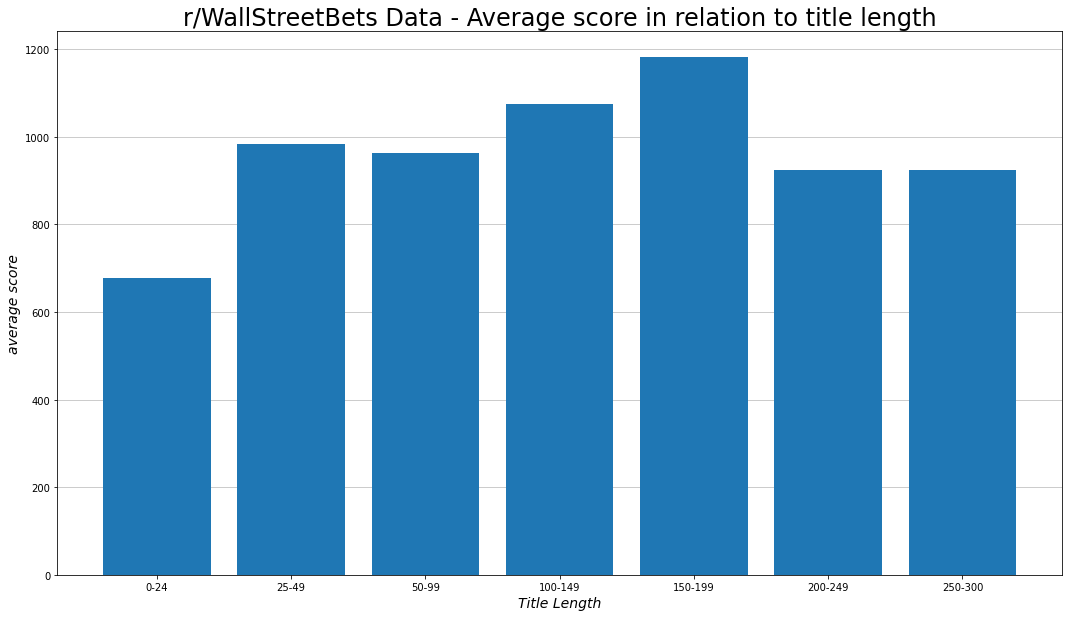

In [491]:
# df['title length'])['score'].mean()
plt.figure(figsize=(18,10))
plt.grid(axis='y', alpha=.8, zorder=0)
plt.bar(['0-24', '25-49', '50-99', '100-149', '150-199', '200-249', '250-300'], height=df.groupby(pd.cut(df['title length'], bins))['score'].mean(), zorder=3)
plt.xlabel('Title Length', fontsize=14, style='italic')
plt.ylabel('average score', fontsize=14, style='italic')
plt.title('r/WallStreetBets Data - Average score in relation to title length', fontsize=24, weight='medium')
plt.savefig('Bar, avgscore ttlength.png', facecolor='white', edgecolor='none')